# Clustering(Lesson 2)
## K-Means(part 2)

### First of all import needed packages

In [209]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
# Use this to show matplotlib and plots properly(But not essential)
%matplotlib inline

### Read the csv(Comma seperated value) file with pandas

In [210]:
Data_Frame = pd.read_csv('Customer_Segmentation.csv')
Data_Frame.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Cleaning your data

In [211]:
# Deleting one column or columns by using axis=1
# If axis=0 > deleting row or rows
Data_Frame = Data_Frame.drop('Address',axis=1)
Data_Frame.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [212]:
# Split all rows and all colums from 1
x = Data_Frame.values[:,1:]
print(x)

[[41.     2.     6.    ...  1.073  0.     6.3  ]
 [47.     1.    26.    ...  8.218  0.    12.8  ]
 [33.     2.    10.    ...  5.802  1.    20.9  ]
 ...
 [25.     4.     0.    ...  3.21   1.    33.4  ]
 [32.     1.    12.    ...  0.696  0.     2.9  ]
 [52.     1.    16.    ...  3.638  0.     8.6  ]]


In [213]:
x = np.nan_to_num(x)

### Normalize data

In [214]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [215]:
# According to x , do fit transformation
Normalized_x = scaler.fit_transform(x)
Normalized_x

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]], shape=(850, 8))

### Create and run your model

In [216]:
Number_of_Clusters = 2
K_means = KMeans(init='k-means++',n_clusters=Number_of_Clusters,n_init=12)
K_means_model = K_means.fit(x)
labels = K_means_model.labels_
print(labels)

[0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 

In [217]:
for i in range(len(labels)) :
    print(f'Data point {i+1} is in cluster number {labels[i]}')
    if i+1 >= 3 :
        break

Data point 1 is in cluster number 0
Data point 2 is in cluster number 1
Data point 3 is in cluster number 0


In [218]:
Data_Frame['Clus_km'] = labels
Data_Frame.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [219]:
Data_Frame.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,428.720627,34.091384,1.659269,7.450392,36.954308,1.295332,2.515850,0.268868,10.246997
1,396.130952,43.583333,2.178571,18.738095,135.321429,4.143726,8.212095,0.187500,9.484524


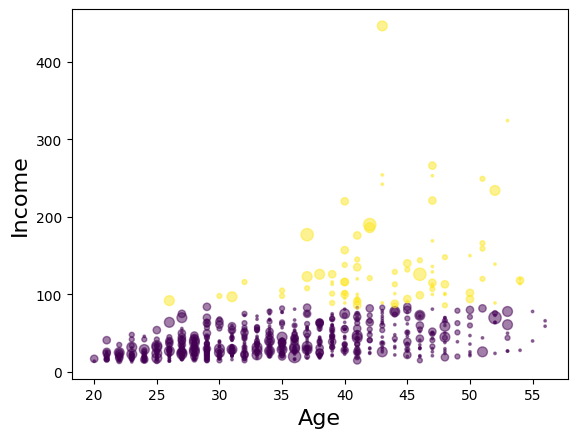

In [220]:
Area = np.pi*(x[:,1])**2
plt.scatter(x[:,0],x[:,3],s=Area,c=labels.astype(np.float64),alpha=0.5)
plt.xlabel('Age',fontsize=16)
plt.ylabel('Income',fontsize=16)
plt.show()

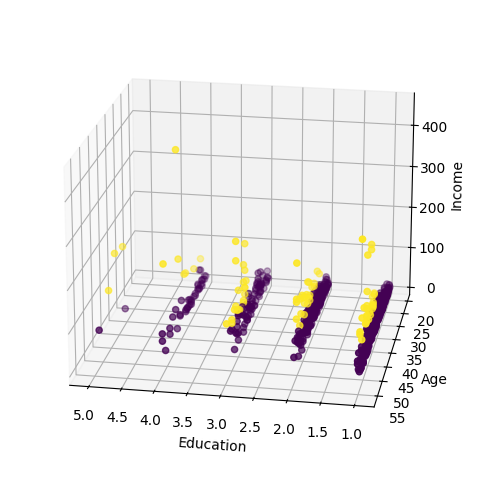

In [221]:
figure = plt.figure(1,figsize=(8, 6))
plt.clf()
ax = figure.add_subplot(111,projection='3d',elev=20,azim=100)
plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
ax.scatter(x[:,1], x[:,0], x[:,3],c= labels.astype('float'))

### Evaluate your model

In [222]:
from sklearn.metrics import (silhouette_score,davies_bouldin_score,calinski_harabasz_score)
inertias = []
sil_scores = []
db_scores = []
ch_scores = []
K= range(2,10)
for k in K :
    K_means_ = KMeans(n_clusters=k,random_state=42)
    labels = K_means_.fit_predict(x)
    inertias.append(K_means_.inertia_)
    sil_scores.append(silhouette_score(x,labels))
    db_scores.append(davies_bouldin_score(x,labels))
    ch_scores.append(calinski_harabasz_score(x,labels))

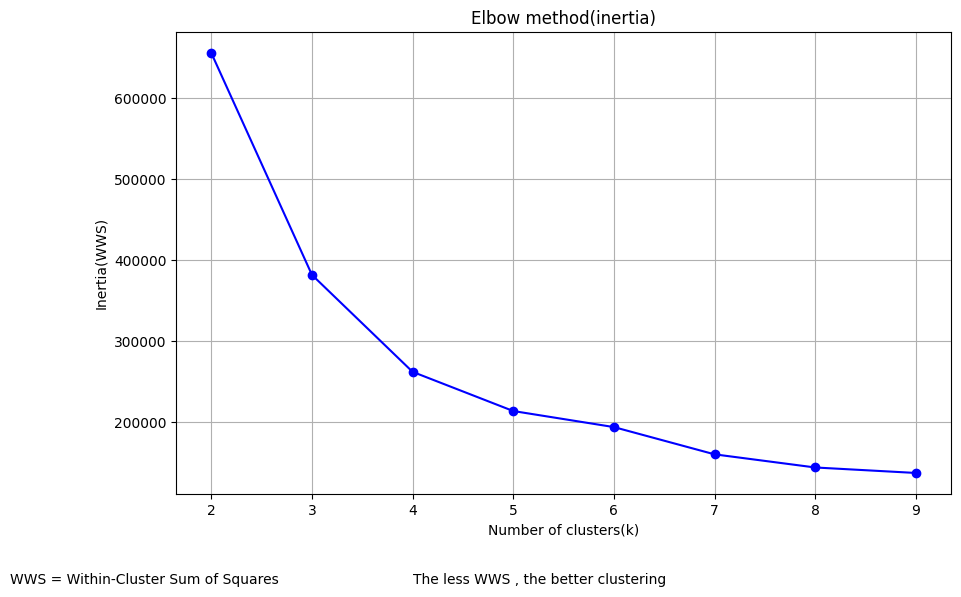

In [223]:
plt.figure(figsize=(10,6))
plt.plot(K,inertias,'o-',color='blue')
plt.title('Elbow method(inertia)')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Inertia(WWS)')
plt.grid(True)
plt.text(0,0,'WWS = Within-Cluster Sum of Squares')
plt.text(4,4,'The less WWS , the better clustering')
plt.show()

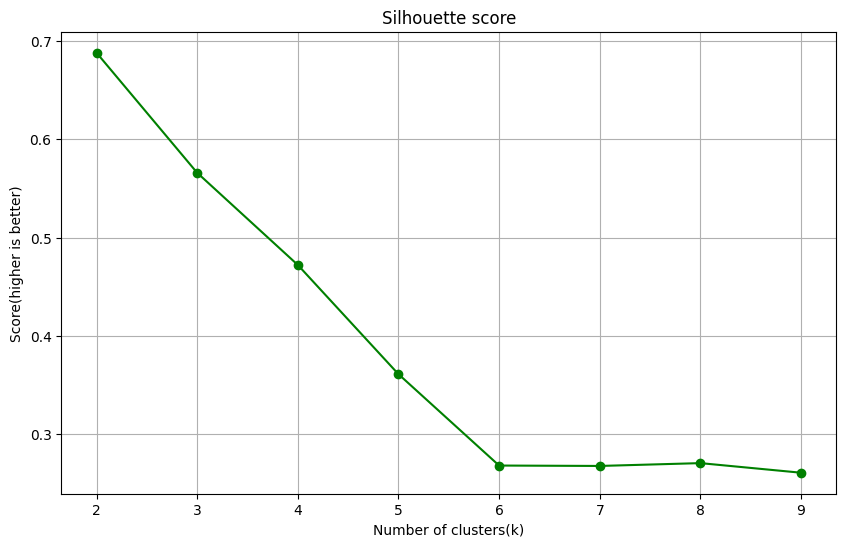

In [224]:
plt.figure(figsize=(10,6))
plt.plot(K,sil_scores,'o-',color='green')
plt.title('Silhouette score')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Score(higher is better)')
plt.grid(True)
plt.show()

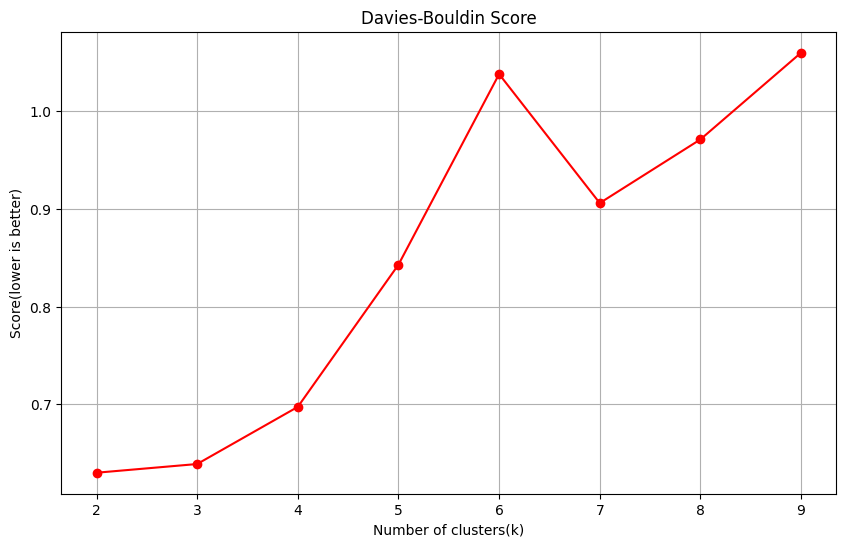

In [225]:
plt.figure(figsize=(10,6))
plt.plot(K,db_scores,'o-',color='red')
plt.title('Davies-Bouldin Score')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Score(lower is better)')
plt.grid(True)
plt.show()

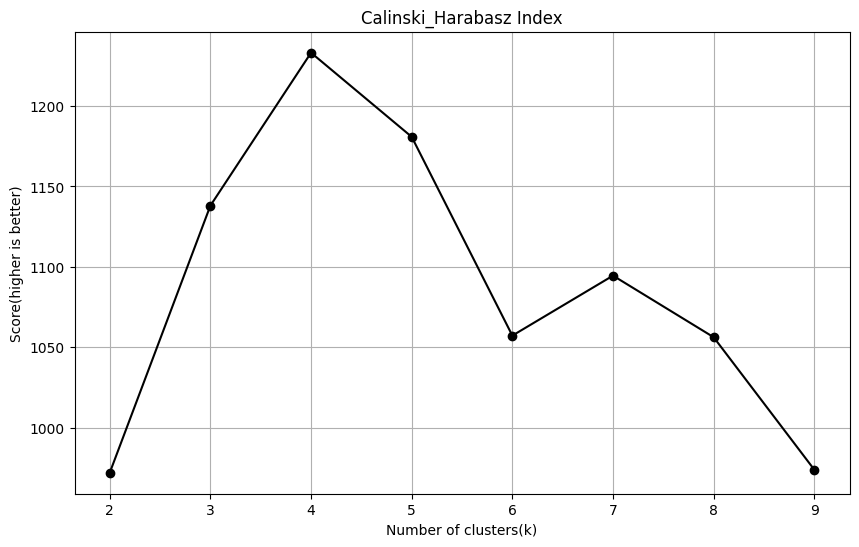

In [226]:
plt.figure(figsize=(10,6))
plt.plot(K,ch_scores,'o-',color='black')
plt.title('Calinski_Harabasz Index')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Score(higher is better)')
plt.grid(True)
plt.show()

In [227]:
print('K | Inertia | Silhouette | Davies-Bouldin | Calinski_Harabasz')
print('-'*61)
for i , k in enumerate(K) :
    print(f'{k:>1} | {inertias[i]:>8.1f} | {sil_scores[i]:>10.3f} | {db_scores[i]:>15.3f} |{ch_scores[i]:>18.1}')

K | Inertia | Silhouette | Davies-Bouldin | Calinski_Harabasz
-------------------------------------------------------------
2 | 655993.7 |      0.688 |           0.630 |             1e+03
3 | 381850.7 |      0.566 |           0.639 |             1e+03
4 | 262070.4 |      0.472 |           0.697 |             1e+03
5 | 213668.3 |      0.361 |           0.843 |             1e+03
6 | 193842.7 |      0.268 |           1.038 |             1e+03
7 | 160173.3 |      0.267 |           0.906 |             1e+03
8 | 143942.1 |      0.270 |           0.971 |             1e+03
9 | 137163.6 |      0.261 |           1.060 |             1e+03


In [228]:
best_K_inertia = K[np.argmin(inertias)]
best_K_silhouette = K[np.argmax(sil_scores)]
best_K_davies_Bouldin = K[np.argmin(db_scores)]
best_K_calinski_Harabasz =  K[np.argmax(ch_scores)]

all_best = [best_K_inertia,best_K_silhouette,best_K_davies_Bouldin,best_K_calinski_Harabasz]
final_k = max(set(all_best),key=all_best.count)
print('The best k will be(based of average) : ',final_k)

The best k will be(based of average) :  2
